In [5]:
from quantify_core.data.handling import (
    default_datadir,
    get_latest_tuid,
    load_dataset,
    locate_experiment_container,
    set_datadir,
)

import numpy as np
import matplotlib.pyplot as plt

# np.complex_ = np.complex128  # Monkey-patch to restore compatibility
# np.float_ = np.float128  # Monkey-patch to restore compatibility



In [6]:
set_datadir(default_datadir())

Data will be saved in:
/home/pschaefers/quantify-data


In [7]:
tuid = get_latest_tuid(contains="_500")
dataset500 = load_dataset(tuid)
dataset500

<xarray.Dataset> Size: 540kB
Dimensions:  (dim_0: 4500)
Coordinates:
    x0       (dim_0) int32 18kB 0 1 2 3 4 5 6 ... 4494 4495 4496 4497 4498 4499
    x1       (dim_0) int32 18kB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Dimensions without coordinates: dim_0
Data variables: (12/14)
    y0       (dim_0) float64 36kB 0.0005765 -1.563e-05 ... 0.000851 -0.006656
    y1       (dim_0) float64 36kB -0.008573 -0.009783 ... -0.009787 -0.001885
    y2       (dim_0) float64 36kB -0.002117 -0.002837 ... -0.00334 -0.0006478
    y3       (dim_0) float64 36kB -0.00182 -0.001095 ... -0.0001065 0.002107
    y4       (dim_0) float64 36kB -0.007287 -0.00821 ... -0.007249 -0.005412
    y5       (dim_0) float64 36kB 0.004298 0.001233 ... -0.004725 0.003691
    ...       ...
    y8       (dim_0) float64 36kB 8.989e-05 -0.0006302 ... -0.0004993 -0.00277
    y9       (dim_0) float64 36kB -0.002751 -0.002953 ... -0.003332 -7.132e-05
    y10      (dim_0) float64 36kB -0.004161 -0.00713 ... -0.00625 0.001203
    y11      (dim_0) float64 36kB 0.003301 0.002549 ... 0.004904 0.004696
    y12      (dim_0) float64 36kB 0.000128 -0.0004016 ... -0.000127 -0.001561
    y13      (dim_0) float64 36kB -0.0007709 -0.001052 ... 0.0009145 0.00642
Attributes:
    tuid:                             20250303-151030-269-b08e41
    name:                             SSRO QND Z1 Z2 Z3 Z4 X1 X3 X4
    grid_2d:                          True
    grid_2d_uniformly_spaced:         True
    1d_2_settables_uniformly_spaced:  False
    xlen:                             4500
    ylen:                             1
    elements:                         ['Z1', 'Z2', 'Z3', 'Z4', 'X1', 'X3', 'X4']
    edges:                            []

In [8]:
from qce_utils.control_interfaces.intrf_channel_identifier import QubitIDObj
from qce_utils.addon_quantify.object_factories.factory_state_acquisition import (
    MultiQubitQNDPiStateClassifierFactory,
    MultiQubitQNDPiStateClassifierContainer,
    AcquisitionType,
)
from qce_utils.addon_quantify.deserialize_xarray_to_obj import DeserializeBootstrap

object_factory = MultiQubitQNDPiStateClassifierFactory(
    acquisition_type=AcquisitionType.THREE_STATE,
    use_heralded_post_selection=True,
)


In [9]:
def std(d,N):
    M = 2**d
    return 1/M*np.sqrt((M-1)/N)

1500
500
['0000000' '0000001' '0000010' '0000011']
0.031000062000124
1.0000000000000002


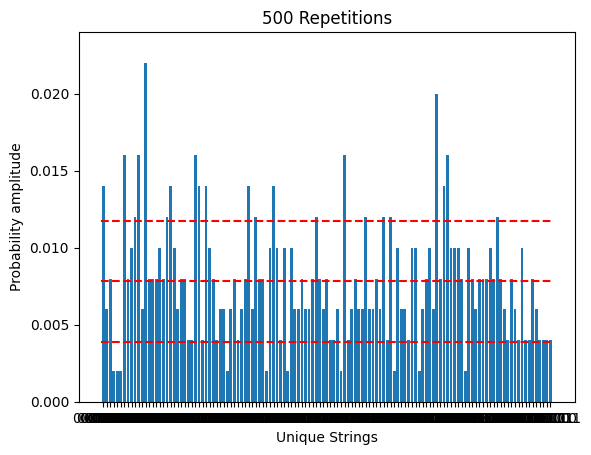

In [10]:
dataset_bootstrap = DeserializeBootstrap(data=dataset500)
data_object: MultiQubitQNDPiStateClassifierContainer = object_factory.construct(dataset_bootstrap)

qubits = data_object.host_qubit_ids

for i in range(len(qubits)):
    if i == 0:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        print(len(container.state_classification))
        print(len(container.get_heralded_classification()))
        result = container.get_heralded_classification().astype(str)
    else:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        tmp = container.get_heralded_classification()
        result = np.char.add(result, tmp.astype(str))

# Count unique occurrences
unique_strings, counts = np.unique(result, return_counts=True)

integer_array = np.vectorize(lambda x: int(x, 2))(unique_strings)
sorted_indices = np.argsort(integer_array)

sorted_unique_strings = unique_strings[sorted_indices]
sorted_counts = counts[sorted_indices]

print(sorted_unique_strings[:4])

print(np.mean(counts)/len(sorted_unique_strings))

# print(unique_strings[np.argmin(counts)])
# print(unique_strings[np.argmax(counts)])
# print(len(unique_strings))

print(np.sum(sorted_counts/len(result)))
# Plot histogram
plt.bar(sorted_unique_strings, sorted_counts/len(result))

plt.hlines(y=1/128 + std(7,500), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128, xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128 - std(7,500), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.xlabel("Unique Strings")
plt.ylabel("Probability amplitude")
plt.title("500 Repetitions")
plt.ylim(0,0.024)
plt.show()

3000
1000
['0000000' '0000001' '0000010' '0000011']
0.06103515625
1.0


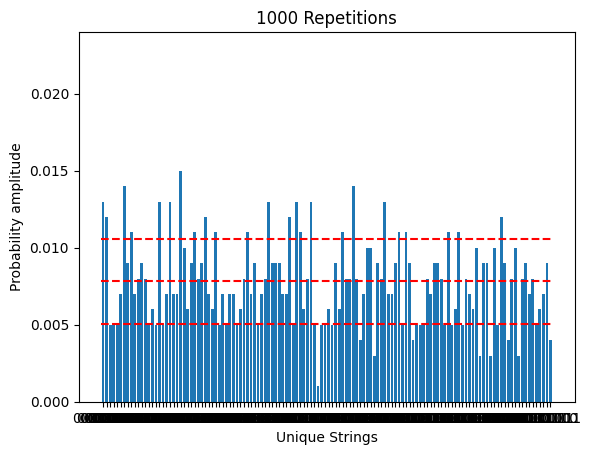

In [18]:
tuid = get_latest_tuid(contains="_1_000")
dataset1000 = load_dataset(tuid)

dataset_bootstrap = DeserializeBootstrap(data=dataset1000)
data_object: MultiQubitQNDPiStateClassifierContainer = object_factory.construct(dataset_bootstrap)

qubits = data_object.host_qubit_ids

for i in range(len(qubits)):
    if i == 0:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        print(len(container.state_classification))
        print(len(container.get_heralded_classification()))
        result = container.get_heralded_classification().astype(str)
    else:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        tmp = container.get_heralded_classification()
        result = np.char.add(result, tmp.astype(str))

# Count unique occurrences
unique_strings, counts = np.unique(result, return_counts=True)

integer_array = np.vectorize(lambda x: int(x, 2))(unique_strings)
sorted_indices = np.argsort(integer_array)

sorted_unique_strings = unique_strings[sorted_indices]
sorted_counts = counts[sorted_indices]

print(sorted_unique_strings[:4])

print(np.mean(counts)/len(sorted_unique_strings))

# print(unique_strings[np.argmin(counts)])
# print(unique_strings[np.argmax(counts)])
# print(len(unique_strings))

print(np.sum(sorted_counts/len(result)))
# Plot histogram
plt.bar(sorted_unique_strings, sorted_counts/len(result))

plt.hlines(y=1/128 + std(7,1000), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128, xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128 - std(7,1000), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.xlabel("Unique Strings")
plt.ylabel("Probability amplitude")
plt.title("1000 Repetitions")
plt.ylim(0,0.024)

plt.show()

30000
10000
['0000000' '0000001' '0000010' '0000011']
0.6103515625
1.0


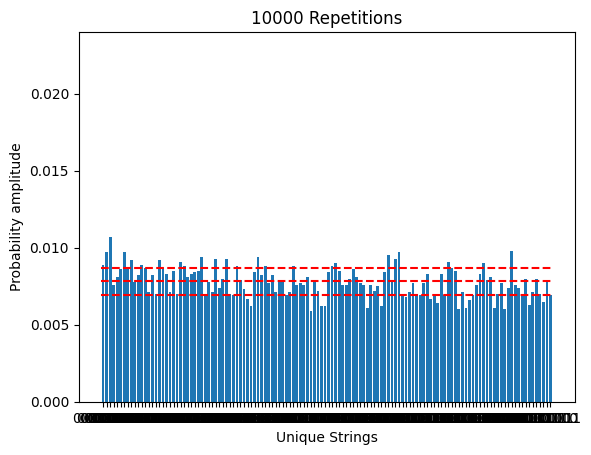

In [19]:
tuid = get_latest_tuid(contains="_10_000")
dataset10000 = load_dataset(tuid)

dataset_bootstrap = DeserializeBootstrap(data=dataset10000)
data_object: MultiQubitQNDPiStateClassifierContainer = object_factory.construct(dataset_bootstrap)

qubits = data_object.host_qubit_ids

for i in range(len(qubits)):
    if i == 0:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        print(len(container.state_classification))
        print(len(container.get_heralded_classification()))
        result = container.get_heralded_classification().astype(str)
    else:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        tmp = container.get_heralded_classification()
        result = np.char.add(result, tmp.astype(str))

# Count unique occurrences
unique_strings, counts = np.unique(result, return_counts=True)

integer_array = np.vectorize(lambda x: int(x, 2))(unique_strings)
sorted_indices = np.argsort(integer_array)

sorted_unique_strings = unique_strings[sorted_indices]
sorted_counts = counts[sorted_indices]

print(sorted_unique_strings[:4])

print(np.mean(counts)/len(sorted_unique_strings))

# print(unique_strings[np.argmin(counts)])
# print(unique_strings[np.argmax(counts)])
# print(len(unique_strings))

print(np.sum(sorted_counts/len(result)))
# Plot histogram
plt.bar(sorted_unique_strings, sorted_counts/len(result))

plt.hlines(y=1/128 + std(7,10000), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128, xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128 - std(7,10000), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.xlabel("Unique Strings")
plt.ylabel("Probability amplitude")
plt.title("10000 Repetitions")
plt.ylim(0,0.024)

plt.show()

300000
100000
['0000000' '0000001' '0000010' '0000011']
6.103515625
1.0


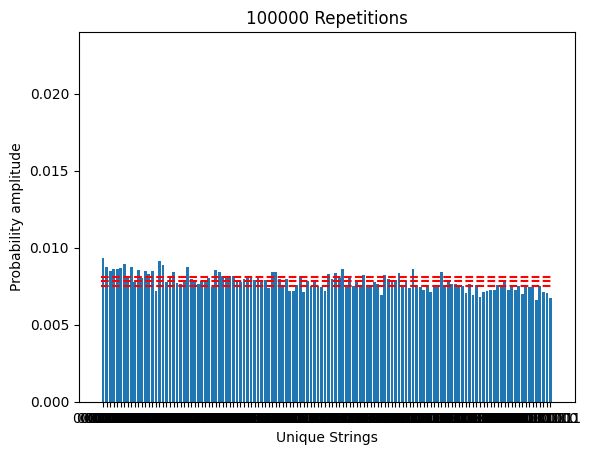

In [20]:
tuid = get_latest_tuid(contains="_100000")
dataset100000 = load_dataset(tuid)

dataset_bootstrap = DeserializeBootstrap(data=dataset100000)
data_object: MultiQubitQNDPiStateClassifierContainer = object_factory.construct(dataset_bootstrap)

qubits = data_object.host_qubit_ids

for i in range(len(qubits)):
    if i == 0:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        print(len(container.state_classification))
        print(len(container.get_heralded_classification()))
        result = container.get_heralded_classification().astype(str)
    else:
        container = data_object.get_state_classifier_container(qubit_id=QubitIDObj(qubits[i].id))
        tmp = container.get_heralded_classification()
        result = np.char.add(result, tmp.astype(str))

# Count unique occurrences
unique_strings, counts = np.unique(result, return_counts=True)

integer_array = np.vectorize(lambda x: int(x, 2))(unique_strings)
sorted_indices = np.argsort(integer_array)

sorted_unique_strings = unique_strings[sorted_indices]
sorted_counts = counts[sorted_indices]

print(sorted_unique_strings[:4])

print(np.mean(counts)/len(sorted_unique_strings))

# print(unique_strings[np.argmin(counts)])
# print(unique_strings[np.argmax(counts)])
# print(len(unique_strings))

print(np.sum(sorted_counts/len(result)))
# Plot histogram
plt.bar(sorted_unique_strings, sorted_counts/len(result))

plt.hlines(y=1/128 + std(7,100000), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128, xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.hlines(y=1/128 - std(7,100000), xmin=-0.5, xmax=len(unique_strings) - 0.5, color='r', linestyle='dashed')
plt.xlabel("Unique Strings")
plt.ylabel("Probability amplitude")
plt.title("100000 Repetitions")
plt.ylim(0,0.024)
plt.show()
